In [1]:
import mdtraj as md
import numpy as np

In [2]:
t1 = md.load('/Users/caixiuhong/Dropbox/cai/btype_cco/snapshot/Btype CcO MD/Btype CcO MD/1_dddro3/md_nvt_25ns_100.dcd',\
             top='/Users/caixiuhong/Dropbox/cai/btype_cco/snapshot/Btype CcO MD/Btype CcO MD/1_dddro3/md_nvt_init.pdb')
t2=md.load('/Users/caixiuhong/Dropbox/cai/btype_cco/snapshot/Btype CcO MD/Btype CcO MD/1_dddro3/md_nvt_50ns_100.dcd',\
             top='/Users/caixiuhong/Dropbox/cai/btype_cco/snapshot/Btype CcO MD/Btype CcO MD/1_dddro3/md_nvt_25ns.pdb')

In [3]:
print(t1)
print(t2)

<mdtraj.Trajectory with 251 frames, 105351 atoms, 23390 residues, and unitcells>
<mdtraj.Trajectory with 251 frames, 105351 atoms, 23390 residues, and unitcells>


In [4]:
t1_top=t1.topology
t2_top=t2.topology
print(t1_top,t2_top)

<mdtraj.Topology with 22637 chains, 23390 residues, 105351 atoms, 80352 bonds> <mdtraj.Topology with 22637 chains, 23390 residues, 105351 atoms, 80352 bonds>


In [5]:
selection1 = t1.topology.select_expression('resn SER and resid 302')
print(selection1)

[atom.index for atom in topology.atoms if ((atom.residue.name == 'SER') and (atom.residue.index == 302))]


In [6]:
print([atom for atom in t1.topology.atoms if ((atom.residue.name == 'SER') and (atom.residue.index == 302))])

[SER303-N, SER303-H, SER303-CA, SER303-HA, SER303-CB, SER303-HB3, SER303-HB2, SER303-OG, SER303-HG, SER303-C, SER303-O]


In [7]:
print([residue for residue in t1.topology.chain(0).residues if residue.index  == 302])

[SER303]


In [8]:
##atom selection
ser_309=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'SER') and (atom.residue.index == 302))]
print(ser_309)
ser_309_o=ser_309[7]
print(ser_309_o)
thr_312=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'THR') and (atom.residue.index == 305))]
print(thr_312)
thr_312_o=thr_312[6]
thr_312_h=thr_312[7]
print(thr_312_o)
tyr_244=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 237))]
tyr_244_o=tyr_244[13]

tyr_248=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'TYR') and (atom.residue.index == 241))]
tyr_248_o=tyr_248[13]
tyr_248_h=tyr_248[14]
print(tyr_248_h)

thr_315=[atom for atom in t1.topology.atoms if ((atom.residue.name == 'THR') and (atom.residue.index == 308))]
print(thr_315)
thr_315_o=thr_315[6]
thr_315_h=thr_315[7]
print(thr_315)

[SER303-N, SER303-H, SER303-CA, SER303-HA, SER303-CB, SER303-HB3, SER303-HB2, SER303-OG, SER303-HG, SER303-C, SER303-O]
SER303-OG
[THR306-N, THR306-H, THR306-CA, THR306-HA, THR306-CB, THR306-HB, THR306-OG1, THR306-HG1, THR306-CG2, THR306-HG21, THR306-HG22, THR306-HG23, THR306-C, THR306-O]
THR306-OG1
TYR242-HH
[THR309-N, THR309-H, THR309-CA, THR309-HA, THR309-CB, THR309-HB, THR309-OG1, THR309-HG1, THR309-CG2, THR309-HG21, THR309-HG22, THR309-HG23, THR309-C, THR309-O]
[THR309-N, THR309-H, THR309-CA, THR309-HA, THR309-CB, THR309-HB, THR309-OG1, THR309-HG1, THR309-CG2, THR309-HG21, THR309-HG22, THR309-HG23, THR309-C, THR309-O]


In [9]:
##compute distances 
ser_309_thr_312_pair= np.asarray([[ser_309_o.index, thr_312_o.index]])
tyr_244_thr_312_pair= np.asarray([[tyr_244_o.index,thr_312_o.index]])
#print(tyr_244_thr_312_pair)
#print(ser_309_thr_312_pair)
#print(ser_309_thr_312)
ser_309_thr_312_dist1=md.compute_distances(t1, ser_309_thr_312_pair, periodic=False)
ser_309_thr_312_dist2=md.compute_distances(t2, ser_309_thr_312_pair, periodic=False)
#print(np.shape(ser_309_thr_312_dist2))
tyr_244_thr_312_dist1=md.compute_distances(t1, tyr_244_thr_312_pair, periodic=False)
tyr_244_thr_312_dist2=md.compute_distances(t2, tyr_244_thr_312_pair, periodic=False)

print(ser_309_thr_312_dist1[-1],ser_309_thr_312_dist2[0])
ser_309_thr_312_dist=np.concatenate((ser_309_thr_312_dist1, ser_309_thr_312_dist2[1:]), axis=0)

tyr_244_thr_312_dist=np.concatenate((tyr_244_thr_312_dist1, tyr_244_thr_312_dist2[1:]), axis=0)
print(np.shape(ser_309_thr_312_dist))
print(np.shape(tyr_244_thr_312_dist))



tyr_248_thr_312_pair= np.asarray([[tyr_248_o.index,thr_312_o.index]])
tyr_248_thr_315_pair= np.asarray([[tyr_248_o.index,thr_315_o.index]])

tyr_248_thr_312_tup=np.asarray([[tyr_248_o.index,tyr_248_h.index,thr_312_o.index]])

tyr_248_thr_312_dist1=md.compute_distances(t1, tyr_248_thr_312_pair, periodic=False)
tyr_248_thr_312_dist2=md.compute_distances(t2, tyr_248_thr_312_pair, periodic=False)

tyr_248_thr_312_ang1=md.compute_angles(t1, tyr_248_thr_312_tup, periodic=False)
tyr_248_thr_312_ang2=md.compute_angles(t2, tyr_248_thr_312_tup, periodic=False)

tyr_248_thr_315_dist1=md.compute_distances(t1, tyr_248_thr_315_pair, periodic=False)
tyr_248_thr_315_dist2=md.compute_distances(t2, tyr_248_thr_315_pair, periodic=False)



tyr_248_thr_312_dist=np.concatenate((tyr_248_thr_312_dist1, tyr_248_thr_312_dist2[1:]), axis=0)
tyr_248_thr_312_ang=np.concatenate((tyr_248_thr_312_ang1, tyr_248_thr_312_ang2[1:]), axis=0)
tyr_248_thr_315_dist=np.concatenate((tyr_248_thr_315_dist1, tyr_248_thr_315_dist2[1:]), axis=0)

[ 0.58372349] [ 0.58372349]
(501, 1)
(501, 1)


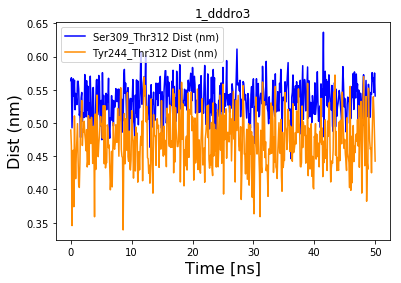

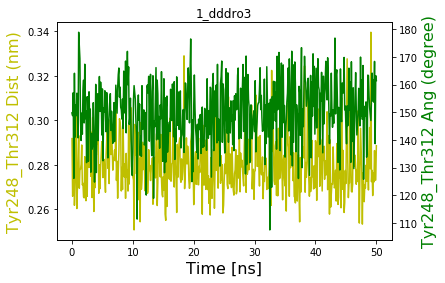

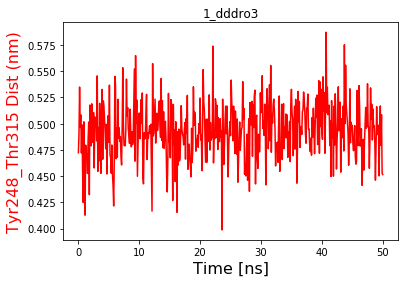

In [22]:
from matplotlib.pylab import *
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)


plot(time/10, ser_309_thr_312_dist, 'b', label='Ser309_Thr312 Dist (nm)')
plot(time/10, tyr_244_thr_312_dist, 'darkorange', label='Tyr244_Thr312 Dist (nm)')
xlabel('Time [ns]', size=16)
ylabel('Dist (nm)', size=16)
legend()
title('1_dddro3')
savefig('1_dddro3_s309_y244_t312.png')
show()

fig, ax1 = plt.subplots()
ax1.plot(time/10, tyr_248_thr_312_dist, 'y')
ax1.set_xlabel('Time [ns]', size=16)
ax1.set_ylabel('Tyr248_Thr312 Dist (nm)', size=16, color='y')
ax2 = ax1.twinx()
ax2.plot(time/10, tyr_248_thr_312_ang*180/np.pi, 'g')
ax2.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16, color='g')
title('1_dddro3')
savefig('1_dddro3_y248_t312_time.png')
show()

plot(time/10, tyr_248_thr_315_dist, 'r')
xlabel('Time [ns]', size=16)
ylabel('Tyr248_Thr315 Dist (nm)', size=16, color='r')
title('1_dddro3')
savefig('1_dddro3_y248_t315_dist.png')
show()



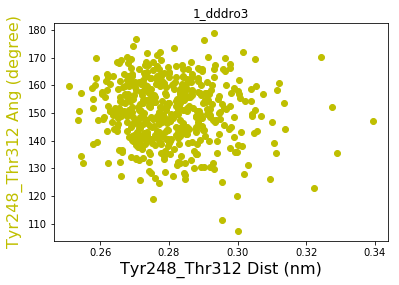

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(tyr_248_thr_312_dist,tyr_248_thr_312_ang*180/np.pi,'yo')
ax1.set_xlabel('Tyr248_Thr312 Dist (nm)', size=16)
ax1.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16, color='y')
title('1_dddro3')
savefig('1_dddro3_y248_t312.png')
show()

In [11]:
def if_hb(trj, don_at, don_h, acc_at):
    #input trajectory, donor atom, donor H and acceptor atom in a trajectory, 
    #return 1 if hydrogen bonded between the supplied atoms in each frame of a trajectory, 0 otherwise
    #criterior: distance Donor atom ---acceptor atom dist < 4.0 anstrom, angle >90 degree
    pair= np.asarray([[don_at.index, acc_at.index]])
    tup=np.asarray([[don_at.index,don_h.index,acc_at.index]])
    dist=md.compute_distances(trj, pair, periodic=False)
    ang=md.compute_angles(trj, tup, periodic=False)
    
    
    hbs=[]
    for i in range(trj.n_frames):
        if ((dist[i])*10 < 4.0) and ((ang[i])*180/np.pi > 90 ) :
            hb=[1]
        else: 
            hb=[0]
            #print('broken')
        hbs.append(hb)
    return np.asarray(hbs)

In [12]:
hb_tyr248_thr312_1=if_hb(t1,tyr_248_o, tyr_248_h, thr_312_o)
hb_tyr248_thr312_2=if_hb(t2,tyr_248_o, tyr_248_h, thr_312_o)
hb_tyr248_thr312=np.concatenate((hb_tyr248_thr312_1, hb_tyr248_thr312_2[1:]), axis=0)

hb_thr315_tyr248_1=if_hb(t1,thr_315_o, thr_315_h, tyr_248_o)
hb_thr315_tyr248_2=if_hb(t2,thr_315_o, thr_315_h, tyr_248_o)
hb_thr315_tyr248=np.concatenate((hb_thr315_tyr248_1, hb_thr315_tyr248_2[1:]), axis=0)

hb_thr312_tyr244_1=if_hb(t1,thr_312_o, thr_312_h, tyr_244_o)
hb_thr312_tyr244_2=if_hb(t2,thr_312_o, thr_312_h, tyr_244_o)
hb_thr312_tyr244=np.concatenate((hb_thr312_tyr244_1, hb_thr312_tyr244_2[1:]), axis=0)

In [13]:
def trip_point(f1,f2,f3):
    tri_points=[]
    for i in range(len(f1)):
        if (f1[i]==f2[i]==f3[i]):
            tri_point=[i,f1[i]]
            tri_points.append(tri_point)
    return tri_points

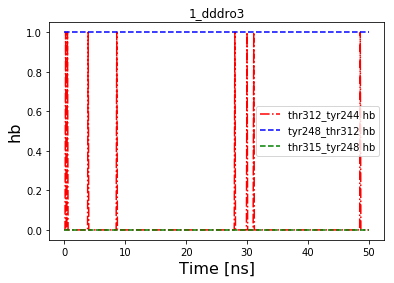

In [14]:
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)

plot(time/10, hb_thr312_tyr244, 'r-.', label='thr312_tyr244 hb')
plot(time/10, hb_tyr248_thr312, 'b--', label='tyr248_thr312 hb')
plot(time/10, hb_thr315_tyr248, 'g--', label='thr315_tyr248 hb')
'''
##plot triple points
trip_points=trip_point(hb_thr312_tyr244,hb_tyr248_thr312,hb_thr315_tyr248)
#print(trip_points)
tri_real_times=[]
tri_points=[]
for i in range(len(trip_points)):
    tri_time=trip_points[i][0]
    tri_real_time=time[tri_time]/10
    #print(tri_real_time)
    tri_point=trip_points[i][1]
    tri_real_times.append(tri_real_time)
    tri_points.append(tri_point)
#print(tri_real_times)
plt.plot(tri_real_times, tri_points, 'r^')
##
'''
xlabel('Time [ns]', size=16)
ylabel('hb', size=16)
legend()
title('1_dddro3')
savefig('1_dddro3.png')
show()


In [25]:
def dist_ang(trj, don_at, don_h, acc_at):
    #input trajectory, donor atom, donor H and acceptor atom in a trajectory, 
    #return distance between don_atom and acc_atom and the angle between them.
    pair= np.asarray([[don_at.index, acc_at.index]])
    tup=np.asarray([[don_at.index,don_h.index,acc_at.index]])
    dist=md.compute_distances(trj, pair, periodic=False)
    ang=md.compute_angles(trj, tup, periodic=False)
    return dist, ang

In [119]:
tyr248_thr312_dist_1,tyr248_thr312_ang_1 =dist_ang(t1,tyr_248_o, tyr_248_h, thr_312_o)
tyr248_thr312_dist_2,tyr248_thr312_ang_2 =dist_ang(t2,tyr_248_o, tyr_248_h, thr_312_o)
tyr248_thr312_dist=np.concatenate((tyr248_thr312_dist_1, tyr248_thr312_dist_2[1:]), axis=0)
tyr248_thr312_ang=np.concatenate((tyr248_thr312_ang_1, tyr248_thr312_ang_2[1:]), axis=0)

thr315_tyr248_dist_1,thr315_tyr248_ang_1 =dist_ang(t1,thr_315_o, thr_315_h, tyr_248_o)
thr315_tyr248_dist_2,thr315_tyr248_ang_2=dist_ang(t2,thr_315_o, thr_315_h, tyr_248_o)
thr315_tyr248_dist=np.concatenate((thr315_tyr248_dist_1, thr315_tyr248_dist_2[1:]), axis=0)
thr315_tyr248_ang=np.concatenate((thr315_tyr248_ang_1, thr315_tyr248_ang_2[1:]), axis=0)

thr312_tyr244_dist_1,thr312_tyr244_ang_1=dist_ang(t1,thr_312_o, thr_312_h, tyr_244_o)
thr312_tyr244_dist_2,thr312_tyr244_ang_2=dist_ang(t2,thr_312_o, thr_312_h, tyr_244_o)
thr312_tyr244_dist=np.concatenate((thr312_tyr244_dist_1, thr312_tyr244_dist_2[1:]), axis=0)
thr312_tyr244_ang=np.concatenate((thr312_tyr244_ang_1, thr312_tyr244_ang_2[1:]), axis=0)

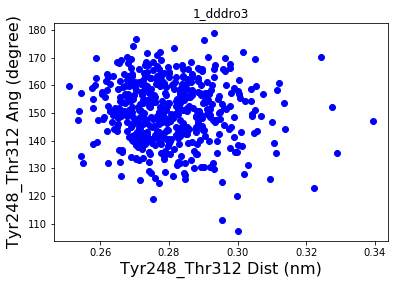

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(tyr248_thr312_dist,tyr248_thr312_ang*180/np.pi,'bo')
ax1.set_xlabel('Tyr248_Thr312 Dist (nm)', size=16)
ax1.set_ylabel('Tyr248_Thr312 Ang (degree)', size=16)
title('1_dddro3')
savefig('1_dddro3_y248_t312.png')
show()

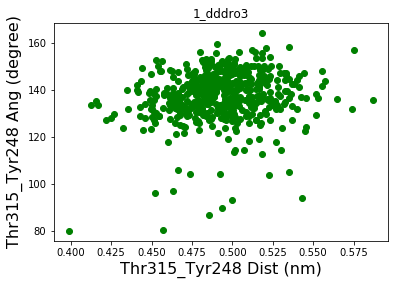

In [35]:
fig, ax1 = plt.subplots()
ax1.plot(thr315_tyr248_dist,thr315_tyr248_ang*180/np.pi,'go')
ax1.set_xlabel('Thr315_Tyr248 Dist (nm)', size=16)
ax1.set_ylabel('Thr315_Tyr248 Ang (degree)', size=16)
title('1_dddro3')
savefig('1_dddro3_t315_y248.png')
show()

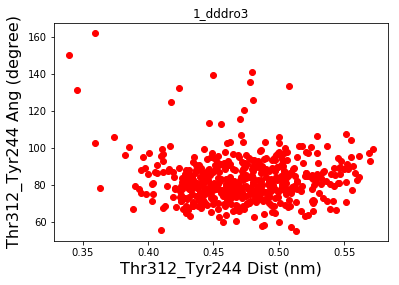

In [36]:
fig, ax1 = plt.subplots()
ax1.plot(thr312_tyr244_dist,thr312_tyr244_ang*180/np.pi,'ro')
ax1.set_xlabel('Thr312_Tyr244 Dist (nm)', size=16)
ax1.set_ylabel('Thr312_Tyr244 Ang (degree)', size=16)
title('1_dddro3')
savefig('1_dddro3_t312_y244.png')
show()

In [120]:
q=np.asarray([thr_312_o.index])
haystack=[atom.index for atom in t1.topology.atoms if (atom.residue.is_water and (atom.name == 'O'))]

wat_thr312_1=md.compute_neighbors(t1, 0.4,q,haystack)
wat_thr312_2=md.compute_neighbors(t2, 0.4,q,haystack)
wat_thr312_num_1=[ len(wat_thr312_1[i]) for i in range(len(wat_thr312_1))]
wat_thr312_num_2=[ len(wat_thr312_2[i]) for i in range(len(wat_thr312_2))]
wat_thr312_num=np.concatenate((wat_thr312_num_1, wat_thr312_num_2[1:]), axis=0)



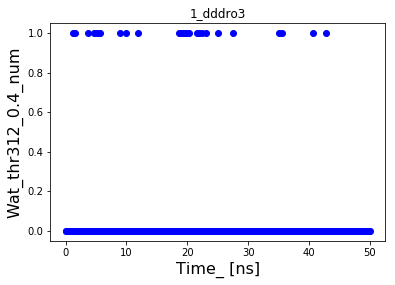

In [135]:
time=np.concatenate((t1.time, (250+t2.time)[1:]), axis=0)
#print(time)

plot(time/10, wat_thr312_num, 'bo')

xlabel('Time_ [ns]', size=16)
ylabel('Wat_thr312_0.4_num', size=16)
title('1_dddro3')
savefig('1_dddro3_wat_thr312_num.png')
show()